In [15]:
#RSA algorithm
import random
import numpy 
from PIL import Image
jpgfile = Image.open("img2.jpg")
#jpgfile.show()
print (jpgfile.bits, jpgfile.size, jpgfile.format)
row,col = jpgfile.size
pixels = jpgfile.load()
primes=[]
def getprimes(n):
    for num in range(2,n+1):
        i = 2
        for i in range(2, num):
            if(num % i == 0):
                i = num
                break;
    # If the number is prime then print it.
        if(i != num):
            primes.append(num)
import random
getprimes(100)



8 (225, 225) JPEG


In [16]:
p = primes[random.randrange(1,24)]
q = primes[random.randrange(1,24)]
print("choosen prime numbers are:")
print (" p=",p," q=", q)
n = p*q
mod=n
phi=(p-1)*(q-1)
e=17
def modInverse(a, m) : 
    a = a % m; 
    for x in range(1, m) : 
        if ((a * x) % m == 1) : 
            return x 
    return 1
d=modInverse(e,phi)
print("Public Key",phi,e)
print("Private Key",p,q,d)


choosen prime numbers are:
 p= 41  q= 37
Public Key 1440 17
Private Key 41 37 593


In [17]:
def encrypt(pt,e,n):
    return pow(pt,e)%n

(190, 181, 176)


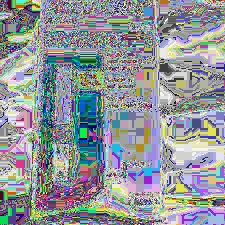

In [18]:
#Encrypting the image to be sent using RSA algorithm
enc = [[0 for x in range(row)] for y in range(col)]
for i in range(col):
    for j in range(row):
        r,g,b = pixels[j,i]
        r1 = encrypt(r,e,n)
        g1 = encrypt(g,e,n)
        b1 = encrypt(b,e,n)
        enc[i][j] = [r1,g1,b1]
print (pixels[row-1,col-1])
img = numpy.array(enc,dtype = numpy.uint8)
img3 = Image.fromarray(img,"RGB")
img3.save("img4.jpg")

#Encrypted image which would be hidden in transmission
img3

In [19]:
#Stegnography
from PIL import Image

def __int_to_bin(rgb):
    r, g, b = rgb
    return ('{0:08b}'.format(r),'{0:08b}'.format(g),'{0:08b}'.format(b))

def __bin_to_int(rgb):
    r, g, b = rgb
    return (int(r, 2),int(g, 2),int(b, 2))

def __merge_rgb(rgb1, rgb2):
    r1, g1, b1 = rgb1
    r2, g2, b2 = rgb2
    rgb = (r1[:4] + r2[:4],g1[:4] + g2[:4],b1[:4] + b2[:4])
    return rgb

    
def merge(img1, img2):
    # Check the images dimensions
    if img2.size[0] > img1.size[0] or img2.size[1] > img1.size[1]:
        raise ValueError('Image 2 should not be larger than Image 1!')
     # Get the pixel map of the two images
    pixel_map1 = img1.load()
    pixel_map2 = img2.load()

    # Create a new image that will be outputted
    new_image = Image.new(img1.mode, img1.size)
    pixels_new = new_image.load()

    for i in range(img1.size[0]):
        for j in range(img1.size[1]):
            rgb1 = __int_to_bin(pixel_map1[i, j])
            #Use a black pixel as default
            rgb2 = __int_to_bin((0, 0, 0))
            #Check if the pixel map position is valid for the second image
            if i < img2.size[0] and j < img2.size[1]:
                rgb2 = __int_to_bin(pixel_map2[i, j])
            #Merge the two pixels and convert it to a integer tuple
            rgb = __merge_rgb(rgb1, rgb2)
            pixels_new[i, j] = __bin_to_int(rgb)
    return new_image




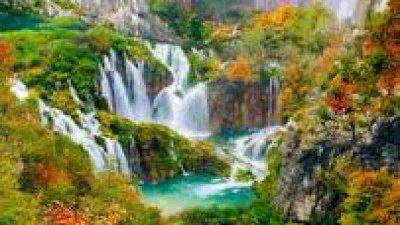

In [20]:
img1=Image.open("img1.jpg")
img2=Image.open("img4.jpg")
transmit_img=merge(img1,img2)
transmit_img

In [21]:
 def unmerge(img):
        """Unmerge an image.
        :param img: The input image.
        :return: The unmerged/extracted image.
        """

        # Load the pixel map
        pixel_map = img.load()

        # Create the new image and load the pixel map
        new_image = Image.new(img.mode, img.size)
        pixels_new = new_image.load()

        # Tuple used to store the image original size
        original_size = img.size

        for i in range(img.size[0]):
            for j in range(img.size[1]):
                # Get the RGB (as a string tuple) from the current pixel
                r, g, b = __int_to_bin(pixel_map[i, j])

                # Extract the last 4 bits (corresponding to the hidden image)
                # Concatenate 4 zero bits because we are working with 8 bit
                rgb = (r[4:] + '0000',
                       g[4:] + '0000',
                       b[4:] + '0000')

                # Convert it to an integer tuple
                pixels_new[i, j] = __bin_to_int(rgb)

                # If this is a 'valid' position, store it
                # as the last valid position
                if pixels_new[i, j] != (0, 0, 0):
                    original_size = (i + 1, j + 1)

        # Crop the image based on the 'valid' pixels
        new_image = new_image.crop((0, 0, original_size[0], original_size[1]))

        return new_image


In [22]:
transmit_img.save("transmitted.jpg")

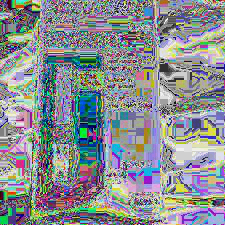

In [23]:
transmit=Image.open("transmitted.jpg")
unmerge(transmit_img)

In [24]:
def decrypt(ct,d,n):
    return pow(ct,d)%n

In [25]:
#Now decrypt the image
dec = [[0 for x in range(row)] for y in range(col)]
for i in range(col):
    for j in range(row):
        r,g,b = enc[i][j]
        r1 = decrypt(r,d,mod)
        g1 = decrypt(g,d,mod)
        b1 = decrypt(b,d,mod)
        dec[i][j] = [r1,g1,b1]
img5 = numpy.array(dec,dtype = numpy.uint8)
img6 = Image.fromarray(img5,"RGB")
img6.save("output.jpg")

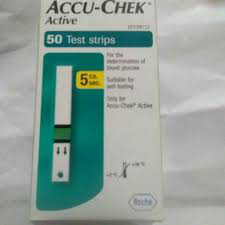

In [26]:
img6